In [1]:
import pandas as pd
import matplotlib as mat
from tabulate import tabulate 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)  

In [2]:
df=pd.read_csv('DS1_C5_S1_EmployeeAttrition_Data_Practice.csv')

## Task1:

In [3]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,3,Sales Executive,4,Single,5993,8,Y,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,2,Research Scientist,2,Married,5130,1,Y,No,4,4,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,2,Laboratory Technician,3,Single,2090,6,Y,Yes,3,2,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,3,Research Scientist,3,Married,2909,1,Y,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,3,Laboratory Technician,2,Married,3468,9,Y,No,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,NaN,Research & Development,23,Medical,2061,3,Male,41,4,Laboratory Technician,4,Married,2571,4,Y,No,3,3,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,2,Healthcare Representative,1,Married,9991,4,Y,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,4,Manufacturing Director,2,Married,6142,1,Y,Yes,4,2,6,0,3,6,2,0,3
1468,49.0,No,Travel_Frequently,Sales,2,Medical,2065,4,Male,63,2,Sales Executive,2,Married,5390,2,Y,No,3,4,17,3,2,9,6,0,8


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.isnull().sum()

Age                         24
Attrition                    0
BusinessTravel              30
Department                   4
DistanceFromHome             0
EducationField              12
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                      45
HourlyRate                   0
JobInvolvement               0
JobRole                     10
JobSatisfaction              0
MaritalStatus               56
MonthlyIncome                0
NumCompaniesWorked           0
Over18                      54
OverTime                     0
PerformanceRating            0
RelationshipSatisfaction     0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1446 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1440 non-null   object 
 3   Department                1466 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   EducationField            1458 non-null   object 
 6   EmployeeNumber            1470 non-null   int64  
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   Gender                    1425 non-null   object 
 9   HourlyRate                1470 non-null   int64  
 10  JobInvolvement            1470 non-null   int64  
 11  JobRole                   1460 non-null   object 
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             1414 non-null   object 
 14  MonthlyI

In [7]:
df.count()

Age                         1446
Attrition                   1470
BusinessTravel              1440
Department                  1466
DistanceFromHome            1470
EducationField              1458
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1425
HourlyRate                  1470
JobInvolvement              1470
JobRole                     1460
JobSatisfaction             1470
MaritalStatus               1414
MonthlyIncome               1470
NumCompaniesWorked          1470
Over18                      1416
OverTime                    1470
PerformanceRating           1470
RelationshipSatisfaction    1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBalance             1470
YearsAtCompany              1470
YearsInCurrentRole          1470
YearsSinceLastPromotion     1470
YearsWithCurrManager        1470
dtype: int64

## Task2:

In [8]:
def separate(df):
    categorical = []
    continuous = []
    for column in df.columns:
        if df[column].nunique()<15:
            categorical.append(column)
        else:
             continuous.append(column)
                
    return categorical, continuous 
categorical, continuous = separate(df)
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical               continuous
------------------------  -----------------------
Attrition                 Age
BusinessTravel            DistanceFromHome
Department                EmployeeNumber
EducationField            HourlyRate
EnvironmentSatisfaction   MonthlyIncome
Gender                    TotalWorkingYears
JobInvolvement            YearsAtCompany
JobRole                   YearsInCurrentRole
JobSatisfaction           YearsSinceLastPromotion
MaritalStatus             YearsWithCurrManager
NumCompaniesWorked
Over18
OverTime
PerformanceRating
RelationshipSatisfaction
TrainingTimesLastYear
WorkLifeBalance


## Task3:

In [9]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}")
    print(f"Mode of {col} is {df[col].mode()[0]}")
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") 

In [10]:
info_of_cat('Attrition')

Unique values in Attrition are: ['Yes' 'No']
Mode of Attrition is No
Number of missing values in Attrition is 0


In [11]:
info_of_cat('BusinessTravel')

Unique values in BusinessTravel are: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' nan]
Mode of BusinessTravel is Travel_Rarely
Number of missing values in BusinessTravel is 30


In [12]:
df['BusinessTravel'].fillna('Unknown', inplace = True)

In [13]:
info_of_cat('Department')

Unique values in Department are: ['Sales' 'Research & Development' 'Human Resources' nan]
Mode of Department is Research & Development
Number of missing values in Department is 4


In [14]:
df['Department'].fillna('Unknown', inplace = True)

In [15]:
info_of_cat('EducationField')

Unique values in EducationField are: ['Life Sciences' 'Other' 'Medical' 'Marketing' nan 'Technical Degree'
 'Human Resources']
Mode of EducationField is Life Sciences
Number of missing values in EducationField is 12


In [16]:
df['EducationField'].fillna('Unknown', inplace = True)

In [17]:
info_of_cat('EnvironmentSatisfaction')

Unique values in EnvironmentSatisfaction are: [2 3 4 1]
Mode of EnvironmentSatisfaction is 3
Number of missing values in EnvironmentSatisfaction is 0


In [18]:
info_of_cat('Gender')

Unique values in Gender are: ['Female' 'Male' nan]
Mode of Gender is Male
Number of missing values in Gender is 45


In [19]:
df['Gender'].fillna('Unknown', inplace = True)

In [20]:
info_of_cat('JobInvolvement')

Unique values in JobInvolvement are: [3 2 4 1]
Mode of JobInvolvement is 3
Number of missing values in JobInvolvement is 0


In [21]:
info_of_cat('JobRole')

Unique values in JobRole are: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' nan 'Human Resources']
Mode of JobRole is Sales Executive
Number of missing values in JobRole is 10


In [22]:
df['JobRole'].fillna('Unknown', inplace = True)

In [23]:
info_of_cat('JobSatisfaction')

Unique values in JobSatisfaction are: [4 2 3 1]
Mode of JobSatisfaction is 4
Number of missing values in JobSatisfaction is 0


In [24]:
info_of_cat('MaritalStatus')

Unique values in MaritalStatus are: ['Single' 'Married' nan 'Divorced']
Mode of MaritalStatus is Married
Number of missing values in MaritalStatus is 56


In [25]:
df['MaritalStatus'].fillna('Unknown', inplace = True)

In [26]:
info_of_cat('NumCompaniesWorked')

Unique values in NumCompaniesWorked are: [8 1 6 9 0 4 5 2 7 3]
Mode of NumCompaniesWorked is 1
Number of missing values in NumCompaniesWorked is 0


In [27]:
info_of_cat('Over18')

Unique values in Over18 are: ['Y' nan]
Mode of Over18 is Y
Number of missing values in Over18 is 54


In [28]:
df['Over18'].fillna('Unknown', inplace = True)

In [29]:
info_of_cat('OverTime')

Unique values in OverTime are: ['Yes' 'No']
Mode of OverTime is No
Number of missing values in OverTime is 0


In [30]:
info_of_cat('PerformanceRating')

Unique values in PerformanceRating are: [3 4]
Mode of PerformanceRating is 3
Number of missing values in PerformanceRating is 0


In [31]:
info_of_cat('RelationshipSatisfaction')

Unique values in RelationshipSatisfaction are: [1 4 2 3]
Mode of RelationshipSatisfaction is 3
Number of missing values in RelationshipSatisfaction is 0


In [32]:
info_of_cat('TrainingTimesLastYear')

Unique values in TrainingTimesLastYear are: [0 3 2 5 1 4 6]
Mode of TrainingTimesLastYear is 2
Number of missing values in TrainingTimesLastYear is 0


In [33]:
info_of_cat('WorkLifeBalance')

Unique values in WorkLifeBalance are: [1 3 2 4]
Mode of WorkLifeBalance is 3
Number of missing values in WorkLifeBalance is 0


## Task4:

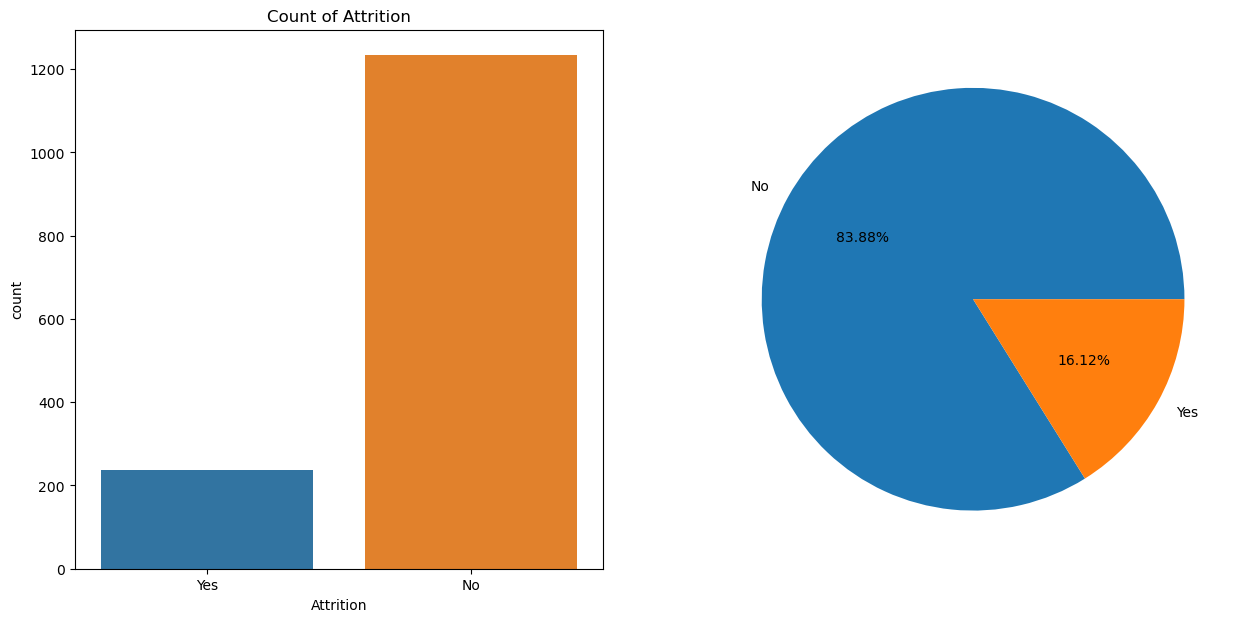

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Attrition")                  
percentage = df["Attrition"].value_counts()        
labels = list(df["Attrition"].value_counts().index) 
sns.countplot(x = df["Attrition"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

### The Dataset indicates that 83.88%(around 1200 employees) have left the company, and 16.12%(arounf 200+ employees) are still in compaany

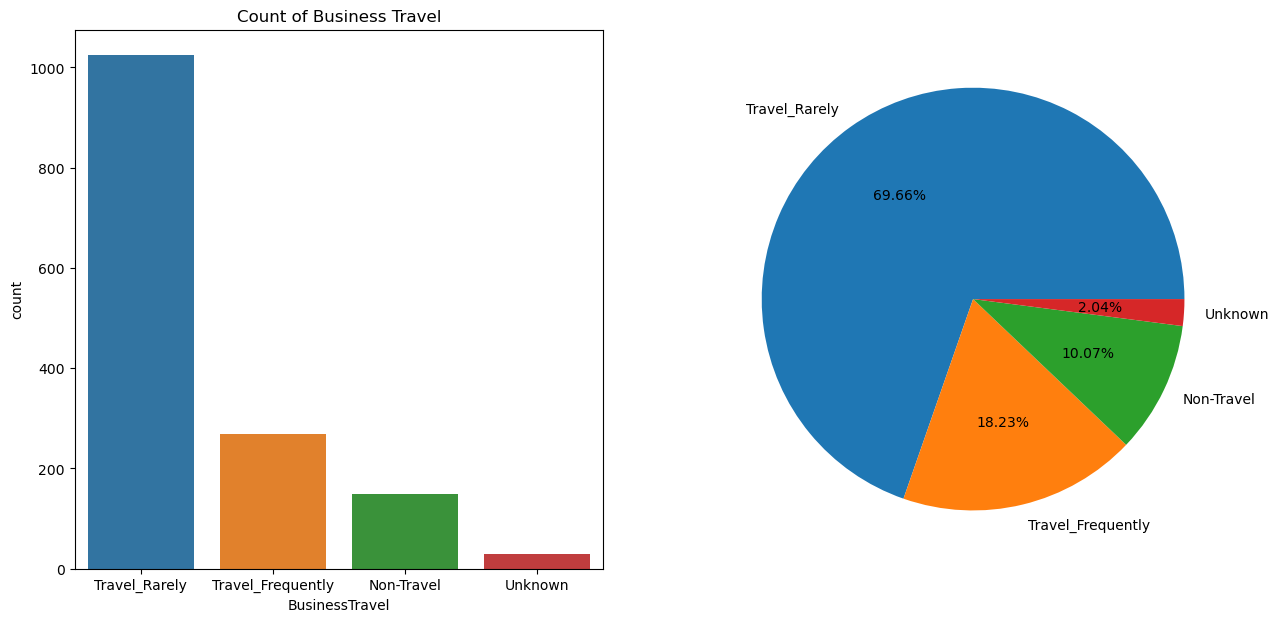

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Business Travel")                  
percentage = df["BusinessTravel"].value_counts()        
labels = list(df["BusinessTravel"].value_counts().index) 
sns.countplot(x = df["BusinessTravel"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

### This dataset indicates that 69.66% employees travels rarely. and 18% travel most frequently. and 10% do not travel at all. and 2% data is unknown.

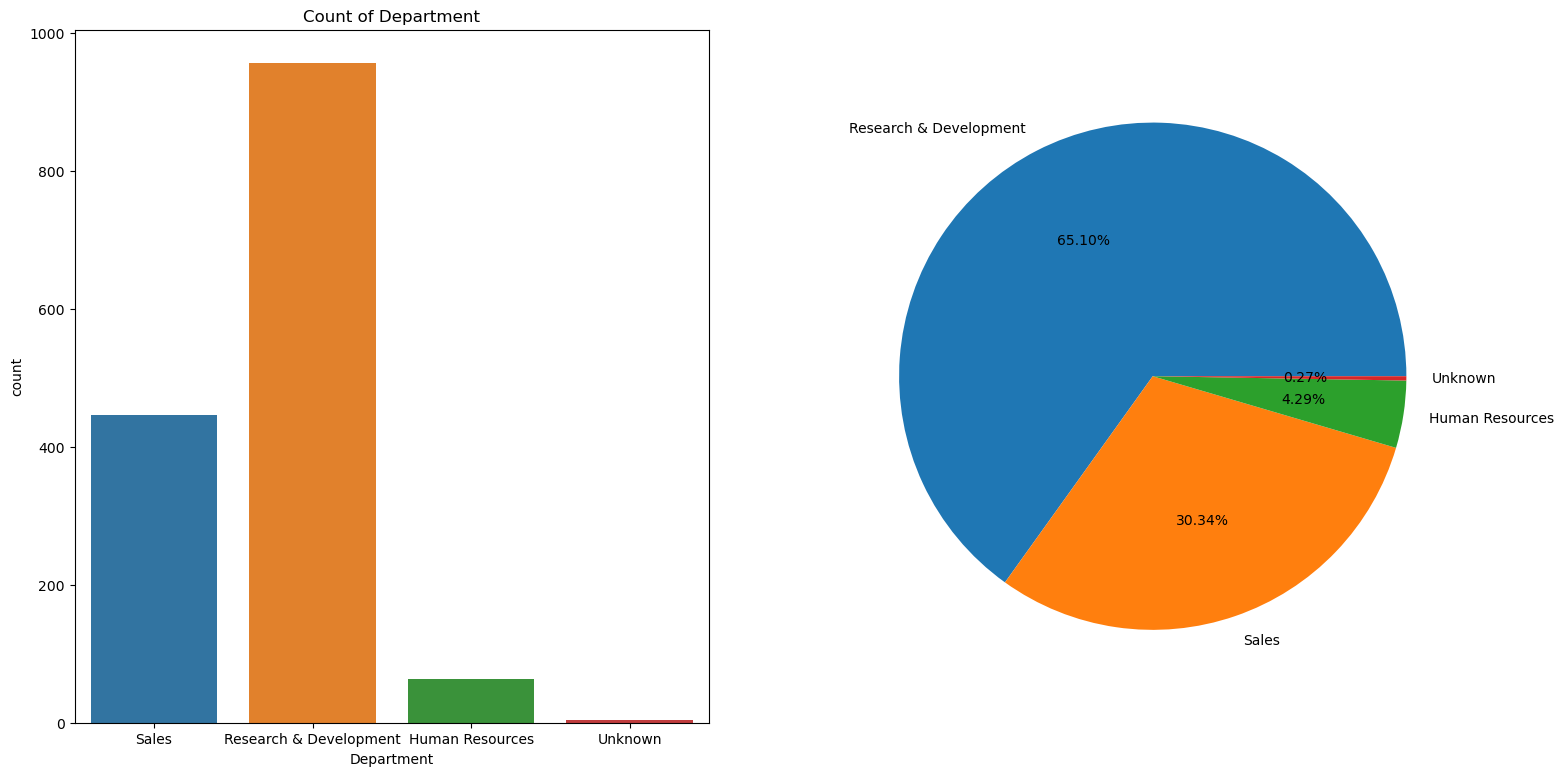

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (18, 9))
ax[0].set_title("Count of Department")                  
percentage = df["Department"].value_counts()        
labels = list(df["Department"].value_counts().index) 
sns.countplot(x = df["Department"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

### This dataset indicates that R&D department consist of 65.10% of employees(around 900+) and 30.34% employees are from sales department(around 400+) and 4.29% are from HR department. And 0.27% departments are unknown

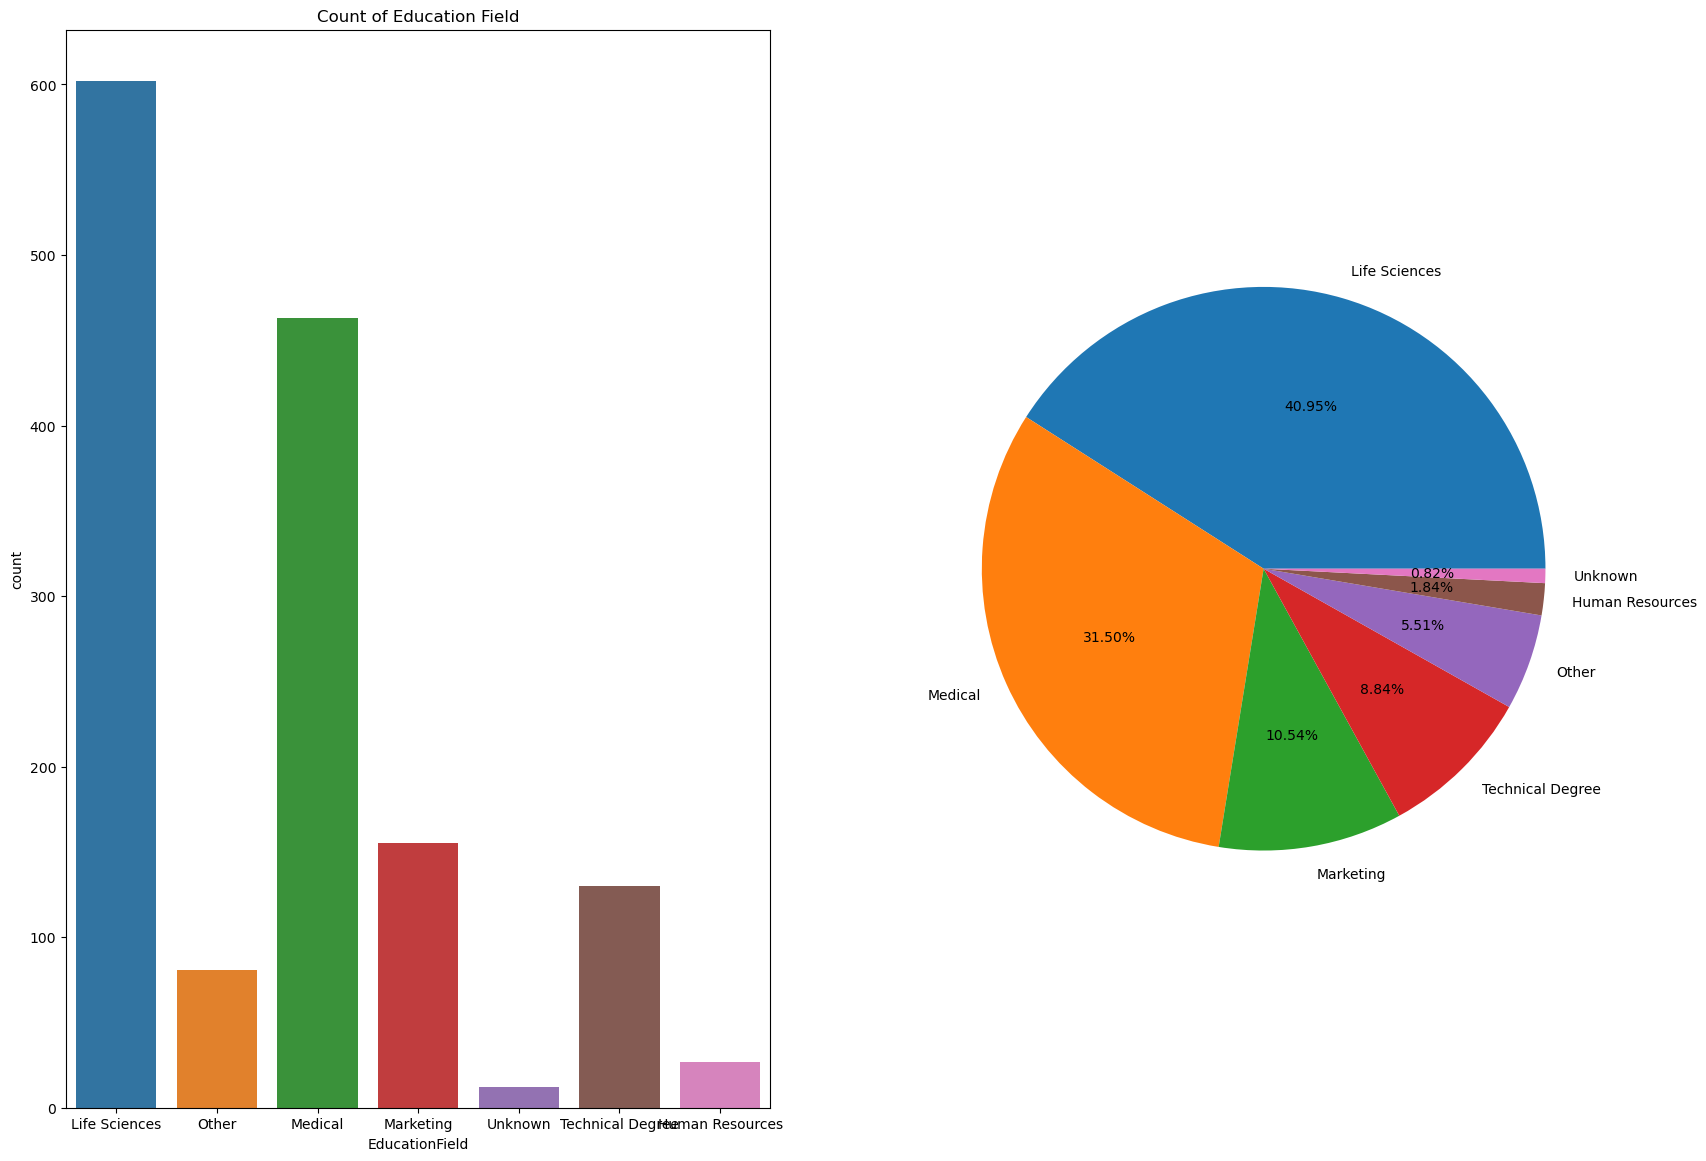

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (20, 14))
ax[0].set_title("Count of Education Field")                  
percentage = df["EducationField"].value_counts()        
labels = list(df["EducationField"].value_counts().index) 
sns.countplot(x = df["EducationField"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

### This dataset indicates that majority of employees have life science and medical educational field(40% & 31% respectively).

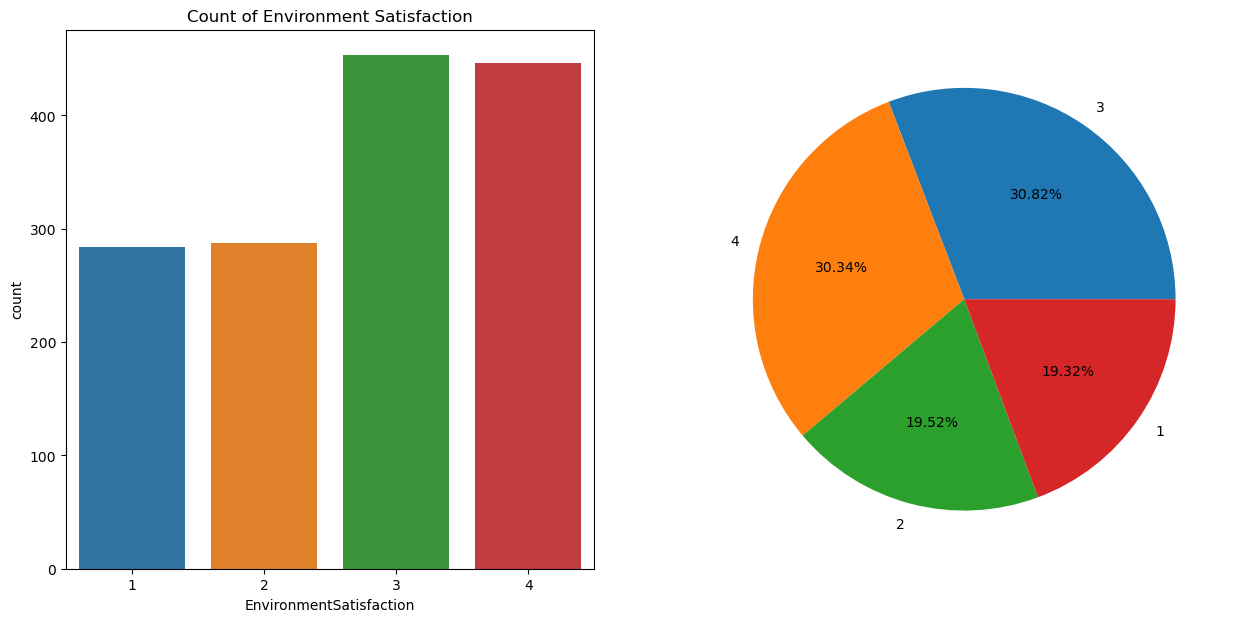

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Environment Satisfaction")                  
percentage = df["EnvironmentSatisfaction"].value_counts()        
labels = list(df["EnvironmentSatisfaction"].value_counts().index) 
sns.countplot(x = df["EnvironmentSatisfaction"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

### This dataset indicates that 40% employees have (1&2) and 60% have (3&4) enviroment satisfaction level.

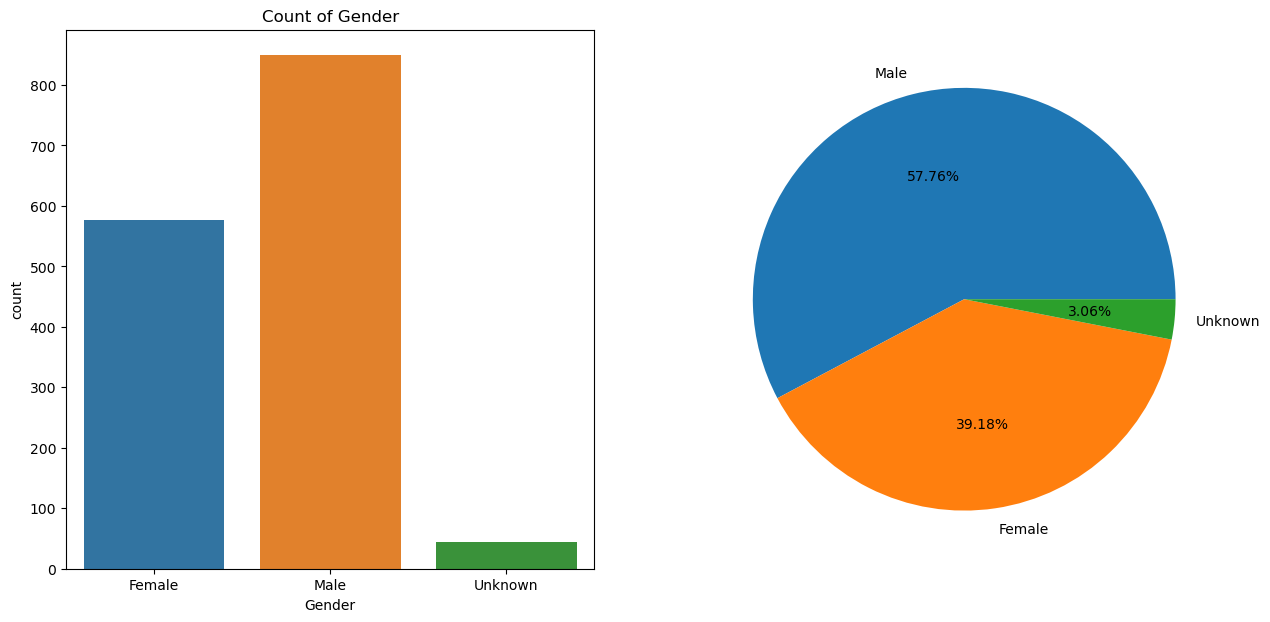

In [39]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Gender")                  
percentage = df["Gender"].value_counts()        
labels = list(df["Gender"].value_counts().index) 
sns.countplot(x = df["Gender"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

## This dataset indicates that there is majority of male employees in company 

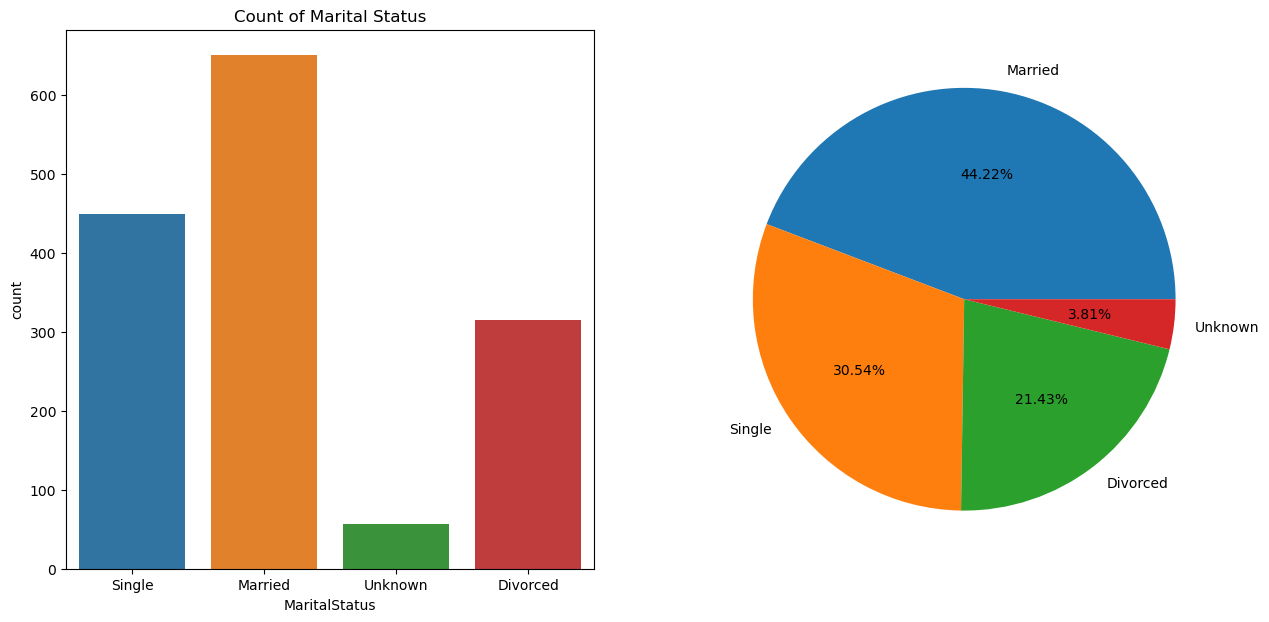

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Marital Status")                  
percentage = df["MaritalStatus"].value_counts()        
labels = list(df["MaritalStatus"].value_counts().index) 
sns.countplot(x = df["MaritalStatus"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

### This dataset indicates that most of employees are married(around 44%) and single and divorced are (30% and 21% respectively) 

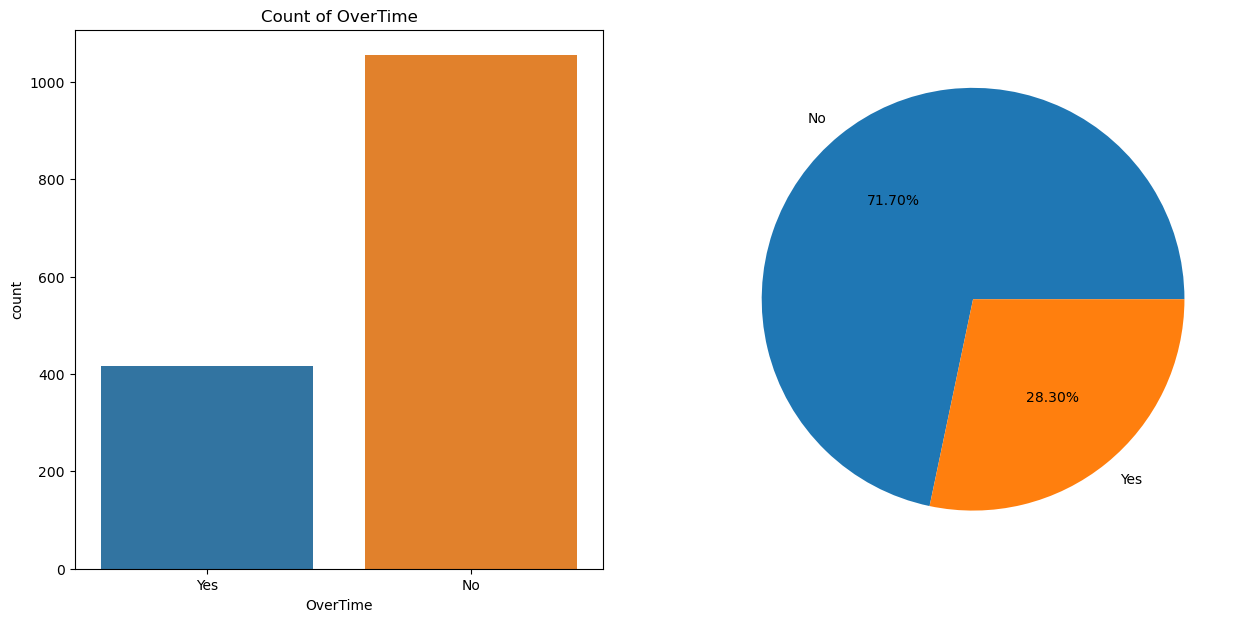

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of OverTime")                  
percentage = df["OverTime"].value_counts()        
labels = list(df["OverTime"].value_counts().index) 
sns.countplot(x = df["OverTime"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

### This Data indicates that only 28% employees do overtime.

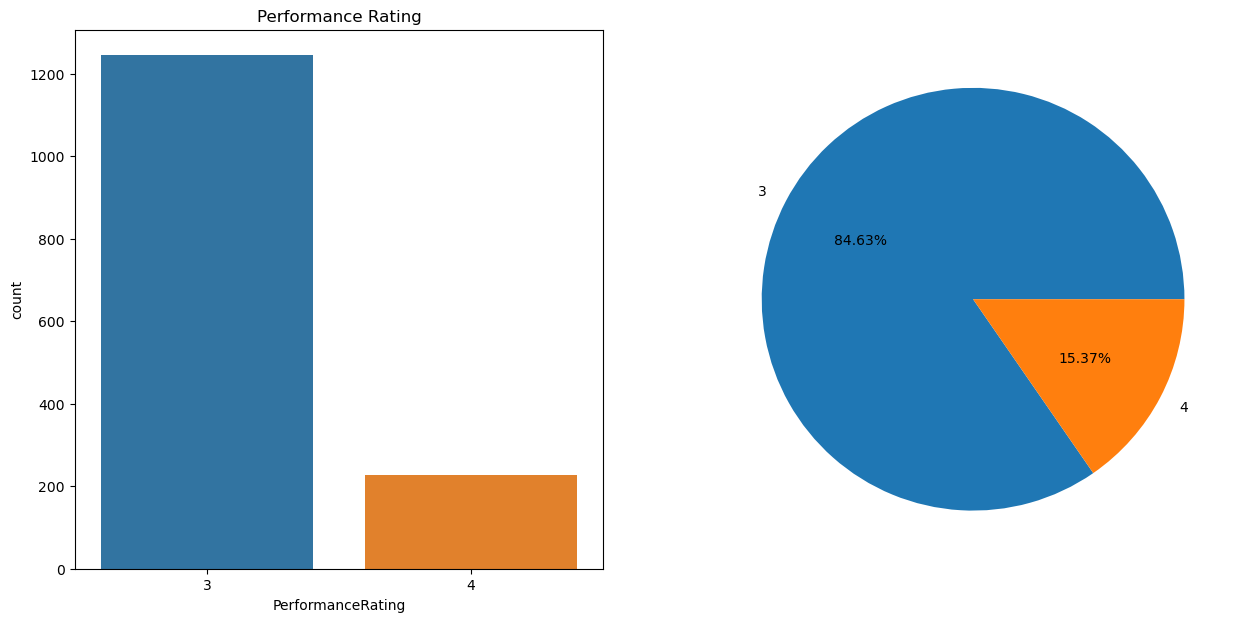

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Performance Rating")                  
percentage = df["PerformanceRating"].value_counts()        
labels = list(df["PerformanceRating"].value_counts().index) 
sns.countplot(x = df["PerformanceRating"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

### This Data indicates that majority of employees have 3 rating. and only 15% have 4 rating

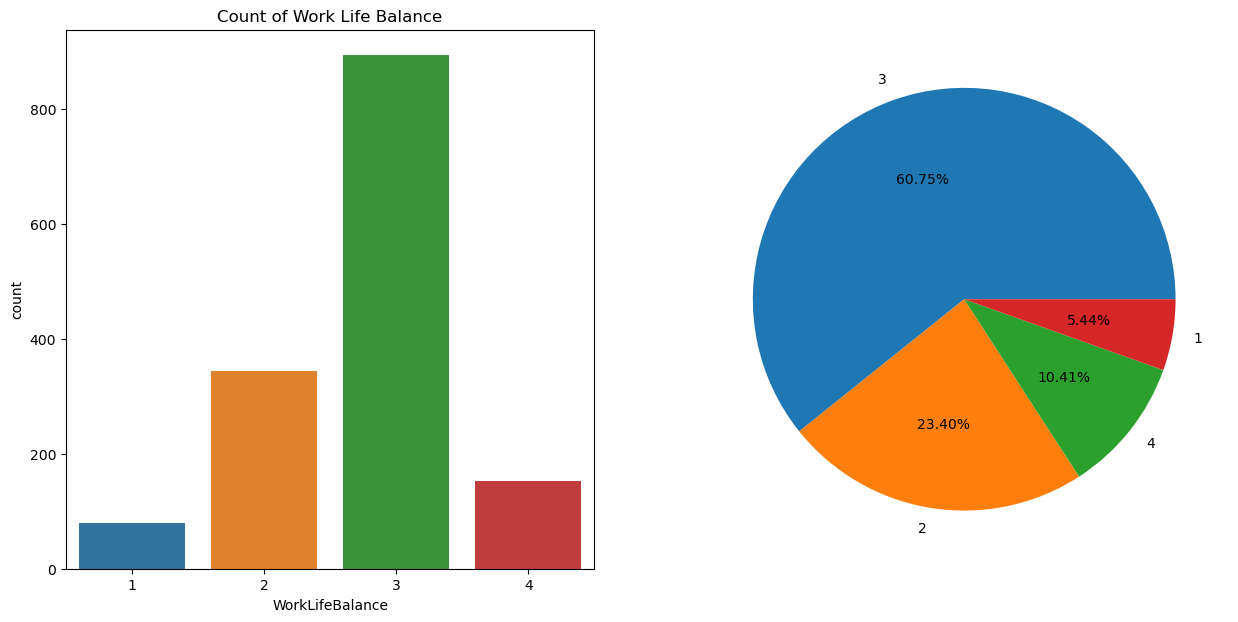

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Work Life Balance")                  
percentage = df["WorkLifeBalance"].value_counts()        
labels = list(df["WorkLifeBalance"].value_counts().index) 
sns.countplot(x = df["WorkLifeBalance"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

### This Data indicates that majority of employees have 3 worklifebalance rating

## Task5:

In [45]:
def T5(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")
    print(f"The Skewness of the {col} is {df[col].skew()}")

In [46]:
T5('Age')

The mean of the Age is 36.93015214384509
The median of the Age is 36.0
The mode of the Age is 34.0
The standard deviation of the Age is 9.16220404447615
Number of missing values in the Age is 24
The Skewness of the Age is 0.4090238232052275


In [47]:
T5('DistanceFromHome')

The mean of the DistanceFromHome is 9.19251700680272
The median of the DistanceFromHome is 7.0
The mode of the DistanceFromHome is 2
The standard deviation of the DistanceFromHome is 8.106864435666084
Number of missing values in the DistanceFromHome is 0
The Skewness of the DistanceFromHome is 0.9581179956568269


In [48]:
T5('EmployeeNumber')

The mean of the EmployeeNumber is 1024.865306122449
The median of the EmployeeNumber is 1020.5
The mode of the EmployeeNumber is 1
The standard deviation of the EmployeeNumber is 602.024334847475
Number of missing values in the EmployeeNumber is 0
The Skewness of the EmployeeNumber is 0.016574019580105036


In [49]:
T5('EnvironmentSatisfaction')

The mean of the EnvironmentSatisfaction is 2.721768707482993
The median of the EnvironmentSatisfaction is 3.0
The mode of the EnvironmentSatisfaction is 3
The standard deviation of the EnvironmentSatisfaction is 1.0930822146349994
Number of missing values in the EnvironmentSatisfaction is 0
The Skewness of the EnvironmentSatisfaction is -0.32165444773937907


In [50]:
T5('HourlyRate')

The mean of the HourlyRate is 65.89115646258503
The median of the HourlyRate is 66.0
The mode of the HourlyRate is 66
The standard deviation of the HourlyRate is 20.329427593996158
Number of missing values in the HourlyRate is 0
The Skewness of the HourlyRate is -0.03231095290044942


In [51]:
T5('JobInvolvement')

The mean of the JobInvolvement is 2.7299319727891156
The median of the JobInvolvement is 3.0
The mode of the JobInvolvement is 3
The standard deviation of the JobInvolvement is 0.7115611429632283
Number of missing values in the JobInvolvement is 0
The Skewness of the JobInvolvement is -0.4984193640419493


In [52]:
T5('JobSatisfaction')

The mean of the JobSatisfaction is 2.7285714285714286
The median of the JobSatisfaction is 3.0
The mode of the JobSatisfaction is 4
The standard deviation of the JobSatisfaction is 1.1028461230547149
Number of missing values in the JobSatisfaction is 0
The Skewness of the JobSatisfaction is -0.3296719586636647


In [53]:
T5('MonthlyIncome')

The mean of the MonthlyIncome is 6502.931292517007
The median of the MonthlyIncome is 4919.0
The mode of the MonthlyIncome is 2342
The standard deviation of the MonthlyIncome is 4707.956783097995
Number of missing values in the MonthlyIncome is 0
The Skewness of the MonthlyIncome is 1.3698166808390662


In [54]:
T5('NumCompaniesWorked')

The mean of the NumCompaniesWorked is 2.6931972789115646
The median of the NumCompaniesWorked is 2.0
The mode of the NumCompaniesWorked is 1
The standard deviation of the NumCompaniesWorked is 2.498009006070751
Number of missing values in the NumCompaniesWorked is 0
The Skewness of the NumCompaniesWorked is 1.026471111968205


In [55]:
T5('PerformanceRating')

The mean of the PerformanceRating is 3.1537414965986397
The median of the PerformanceRating is 3.0
The mode of the PerformanceRating is 3
The standard deviation of the PerformanceRating is 0.36082352460434486
Number of missing values in the PerformanceRating is 0
The Skewness of the PerformanceRating is 1.921882702142603


In [56]:
T5('RelationshipSatisfaction')

The mean of the RelationshipSatisfaction is 2.7122448979591836
The median of the RelationshipSatisfaction is 3.0
The mode of the RelationshipSatisfaction is 3
The standard deviation of the RelationshipSatisfaction is 1.081208886440361
Number of missing values in the RelationshipSatisfaction is 0
The Skewness of the RelationshipSatisfaction is -0.30282756517072296


In [57]:
T5('TotalWorkingYears')

The mean of the TotalWorkingYears is 11.279591836734694
The median of the TotalWorkingYears is 10.0
The mode of the TotalWorkingYears is 10
The standard deviation of the TotalWorkingYears is 7.780781675515004
Number of missing values in the TotalWorkingYears is 0
The Skewness of the TotalWorkingYears is 1.1171718528128527


In [58]:
T5('TrainingTimesLastYear')

The mean of the TrainingTimesLastYear is 2.7993197278911564
The median of the TrainingTimesLastYear is 3.0
The mode of the TrainingTimesLastYear is 2
The standard deviation of the TrainingTimesLastYear is 1.2892706207958435
Number of missing values in the TrainingTimesLastYear is 0
The Skewness of the TrainingTimesLastYear is 0.5531241710537028


In [59]:
T5('WorkLifeBalance')

The mean of the WorkLifeBalance is 2.7612244897959184
The median of the WorkLifeBalance is 3.0
The mode of the WorkLifeBalance is 3
The standard deviation of the WorkLifeBalance is 0.7064758297141522
Number of missing values in the WorkLifeBalance is 0
The Skewness of the WorkLifeBalance is -0.5524802990965146


In [60]:
T5('YearsAtCompany')

The mean of the YearsAtCompany is 7.0081632653061225
The median of the YearsAtCompany is 5.0
The mode of the YearsAtCompany is 5
The standard deviation of the YearsAtCompany is 6.126525152403566
Number of missing values in the YearsAtCompany is 0
The Skewness of the YearsAtCompany is 1.7645294543422085


In [61]:
T5('YearsInCurrentRole')

The mean of the YearsInCurrentRole is 4.229251700680272
The median of the YearsInCurrentRole is 3.0
The mode of the YearsInCurrentRole is 2
The standard deviation of the YearsInCurrentRole is 3.6231370346706395
Number of missing values in the YearsInCurrentRole is 0
The Skewness of the YearsInCurrentRole is 0.9173631562908262


In [62]:
T5('YearsSinceLastPromotion')

The mean of the YearsSinceLastPromotion is 2.1877551020408164
The median of the YearsSinceLastPromotion is 1.0
The mode of the YearsSinceLastPromotion is 0
The standard deviation of the YearsSinceLastPromotion is 3.222430279137968
Number of missing values in the YearsSinceLastPromotion is 0
The Skewness of the YearsSinceLastPromotion is 1.9842899833524859


In [63]:
T5('YearsWithCurrManager')

The mean of the YearsWithCurrManager is 4.12312925170068
The median of the YearsWithCurrManager is 3.0
The mode of the YearsWithCurrManager is 2
The standard deviation of the YearsWithCurrManager is 3.5681361205404407
Number of missing values in the YearsWithCurrManager is 0
The Skewness of the YearsWithCurrManager is 0.8334509919918475


## Task6:

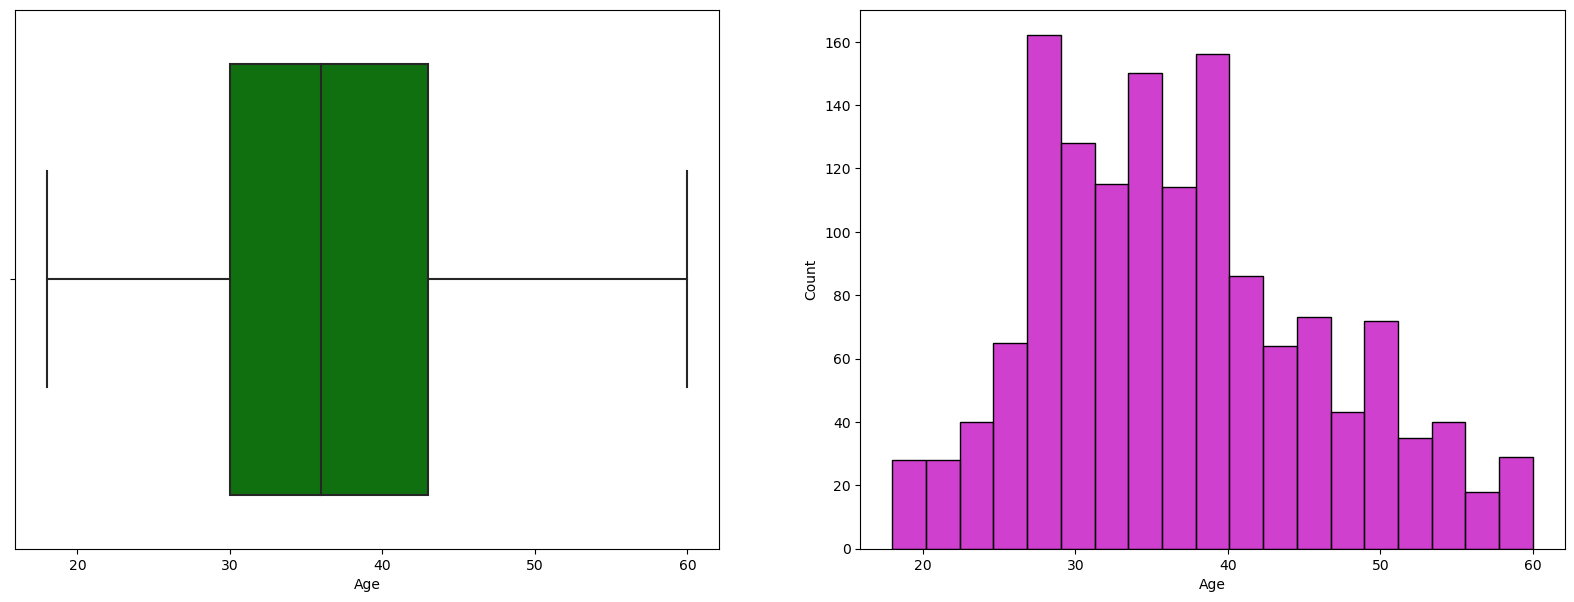

In [64]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))             
sns.histplot(x = df["Age"], ax =ax[1], color = "m") 
sns.boxplot(x = df["Age"], ax = ax[0], color = "g") 
plt.show()

### This Data indicates that majority of employees are from 28-45 years of age group

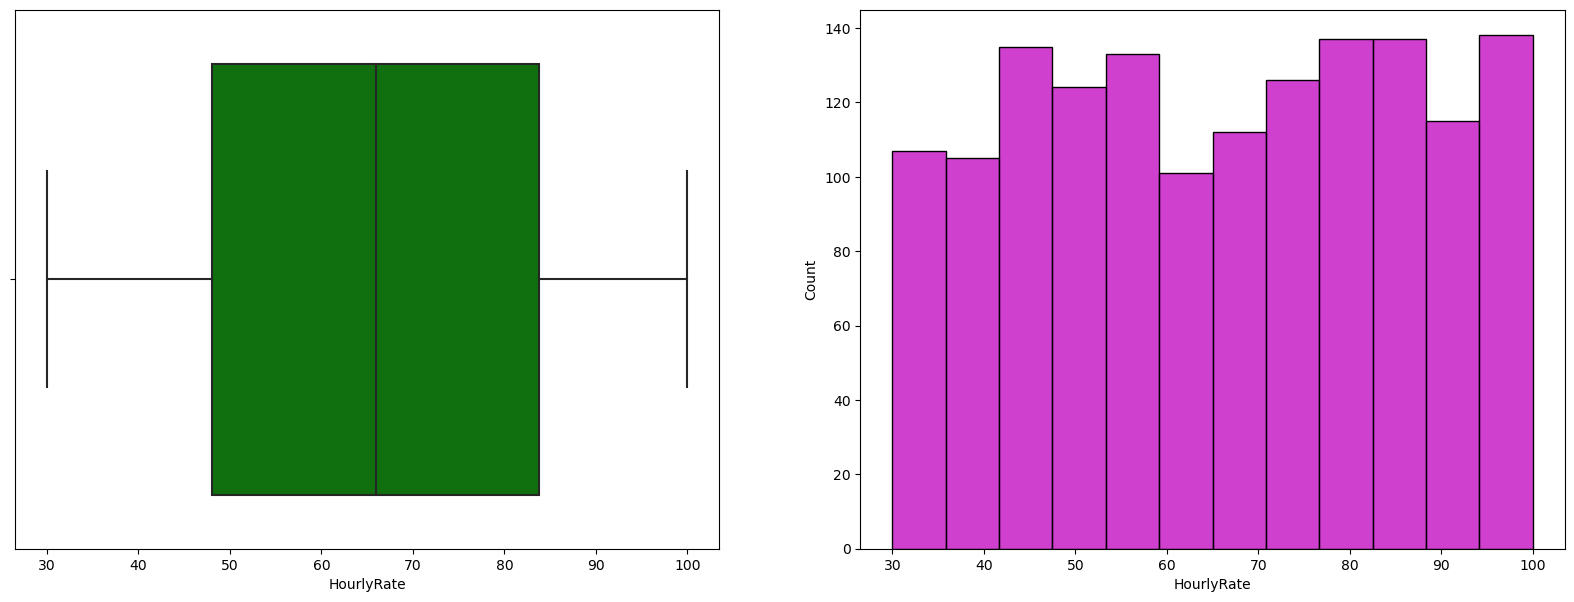

In [65]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))             
sns.histplot(x = df["HourlyRate"], ax =ax[1], color = "m") 
sns.boxplot(x = df["HourlyRate"], ax = ax[0], color = "g") 
plt.show()

### This Data indicates that the hourly rates are distributed equally(from 30-100) among all employees of company

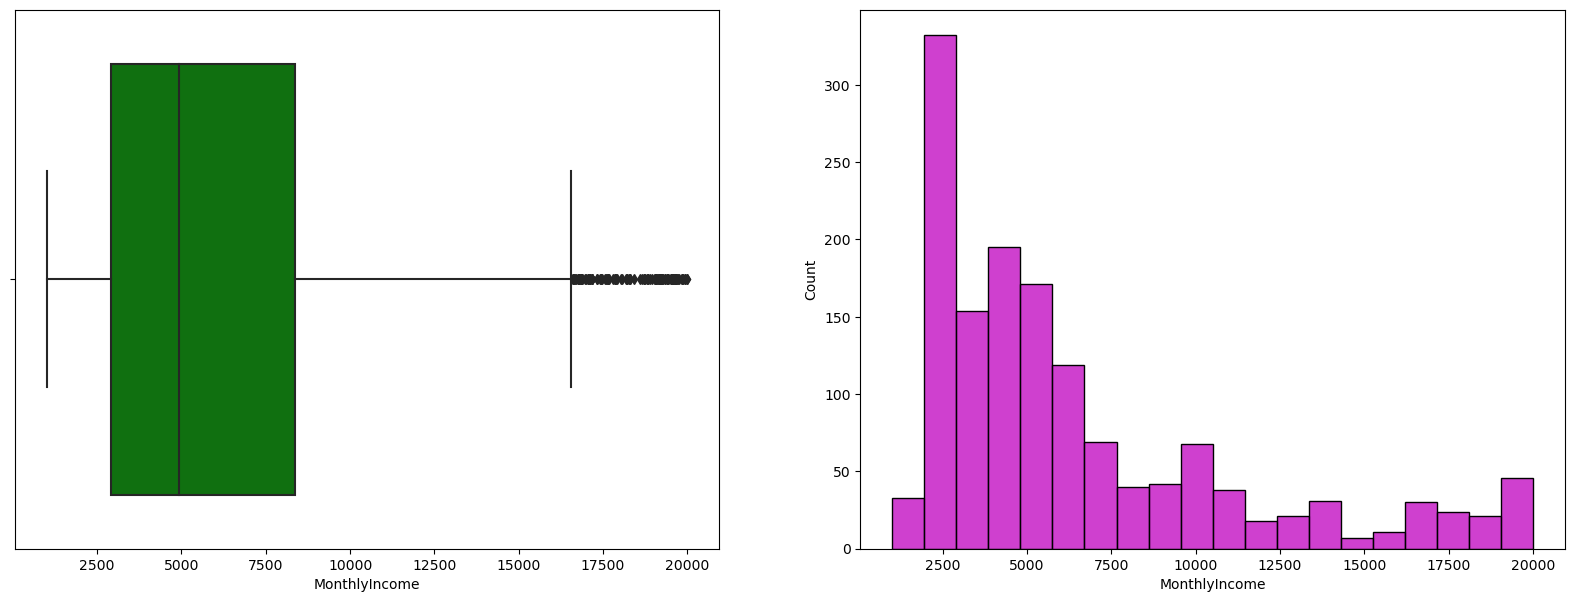

In [66]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))             
sns.histplot(x = df["MonthlyIncome"], ax =ax[1], color = "m") 
sns.boxplot(x = df["MonthlyIncome"], ax = ax[0], color = "g") 
plt.show()

### This Data indicates that most of employees have monthly income between (2500-7500). and there are outliers also that have salary greater than 17500